In [277]:
#!pip install plotly==4.14.3
#!pip install "notebook>=5.3" "ipywidgets>=7.5"
#!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re  
import seaborn as sns
import sklearn

### Importamos el CSV de escuelas en Jalisco

In [226]:
#Deserción en escuelas de jalisco 2018
# Interpretación de datos con la finalidad de descubrir cuantos alumnos no seguiran estudisando para el siguiente ciclo escolar 
df_escuelas = pd.read_csv('bd_original.csv',encoding = 'unicode_escape')
df_escuelas

,CLAVE CT,NOM TURNO,NOMBRE CT,DOMICILIO,LOCALIDAD INEGI,NOMBRE LOCALIDAD,NOMBRE COLONIA,Full Address,MUNICIPIO,NOMBRE MUNICIPIO,...,DOCENTES,GRUPOS,DOCENETE EDUCACION FISICA,DOCENTE ACTIVIDADES ARTISTICAS,DOCENTE ACTIVIDADES TECNONOLOGICAS,DOCENTE DE IDIOMAS,PERSONAL DE ADMINISTRATIVO Y SERVICIOS,DIRECTOR CON GRUPO,DIRECTOR SIN GRUPO,TOTAL DE PERSONAL
0,14DJN0128O,MATUTINO,juan de la barera,ARQUIMEDES 723,1,GUADALAJARA,HERMOSA PROVINCIA,ARQUIMEDES 723 GUADALAJARA HERMOSA PROVINCIA,39,GUADALAJARA,...,6,6,1,1,0,0,2,0,1,11
1,14DJN0129N,MATUTINO,josefa ortÃ­z de domÃ­nguez,OBREGON 70,1,AUTLAN DE NAVARRO,0,OBREGON 70 AUTLAN DE NAVARRO 0,15,AUTLAN DE NAVARRO,...,7,7,1,1,0,0,2,1,0,11
2,14DJN0130C,MATUTINO,rOSAURA sAPATA,PEDRO CELESTINO NEGRETE 144,1,GUADALAJARA,OBLATOS,PEDRO CELESTINO NEGRETE 144 GUADALAJARA OBLATOS,39,GUADALAJARA,...,7,7,1,1,0,0,2,0,1,12
3,14DJN0132A,MATUTINO,Unidad Modelo,UNIDAD MODELO,1,GUADALAJARA,UNIDAD MODELO,UNIDAD MODELO GUADALAJARA UNIDAD MODELO,39,GUADALAJARA,...,5,5,1,2,0,0,2,0,1,11
4,14DJN0133Z,MATUTINO,CIPRIANA GUTIERREZ RODRIGUEZ,GREGORIO DAVILA 1081,1,GUADALAJARA,MEZQUITAN COUNTRY,GREGORIO DAVILA 1081 GUADALAJARA MEZQUITAN COU...,39,GUADALAJARA,...,4,4,1,0,0,0,2,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14013,14XTC0022J,MATUTINO,CECYTEJ SAN IGNACIO CERRO GORDO EXTENSION CA...,PROLONGACION ITURBIDE 797,58,CAPILLA DE GUADALUPE,EL SALTILLO,PROLONGACION ITURBIDE 797 CAPILLA DE GUADALUPE...,93,TEPATITLAN DE MORELOS,...,0,9,0,0,0,0,0,0,0,0
14014,14XTC0206Q,VESPERTINO,CECYTEJ TOTATICHE EXTENSION COLOTLAN,AVENIDA DE LA JUVENTUD 16,1,COLOTLAN,CUARTO CENTENARIO,AVENIDA DE LA JUVENTUD 16 COLOTLAN CUARTO CENT...,25,COLOTLAN,...,0,5,0,0,0,0,0,0,0,0
14015,14XTC0210C,MATUTINO,CECYTEJ ENCARNACION DE DIAZ EXTENSION BAJIO D...,JOSE DE JESUS MUâOZ,17,BAJIO DE SAN JOSE,0,JOSE DE JESUS MUâOZ BAJIO DE SAN JOSE 0,35,ENCARNACION DE DIAZ,...,0,3,0,0,0,0,0,0,0,0
14016,14XTC0210C,VESPERTINO,CECYTEJ ENCARNACION DE DIAZ EXTENSION BAJIO D...,JOSE DE JESUS MUâOZ,17,BAJIO DE SAN JOSE,0,JOSE DE JESUS MUâOZ BAJIO DE SAN JOSE 0,35,ENCARNACION DE DIAZ,...,0,1,0,0,0,0,0,0,0,0


In [227]:
df_escuelas.dtypes

CLAVE CT                                  object
NOM TURNO                                 object
NOMBRE CT                                 object
DOMICILIO                                 object
LOCALIDAD INEGI                            int64
NOMBRE LOCALIDAD                          object
NOMBRE COLONIA                            object
Full Address                              object
MUNICIPIO                                  int64
NOMBRE MUNICIPIO                          object
SOSTENIMIENTO                             object
NIVEL                                     object
PROGRAMA                                  object
HOMBRES 1Â¡                                int64
MUJERES 1Â¡                                int64
TOTAL 1Â¡                                  int64
HOMBRES 2Â¡                                int64
MUJERES 2Â¡                                int64
TOTAL 2Â¡                                  int64
HOMBRES 3Â¡                                int64
MUJERES 3Â¡         

### Limpiamos el Data Frame con las columnas que se necesitaran

In [228]:
df_escuelas.drop(df_escuelas.columns[[0, 3, 4, 5, 6, 8]], axis = 1, inplace = True)
df_escuelas

,NOM TURNO,NOMBRE CT,Full Address,NOMBRE MUNICIPIO,SOSTENIMIENTO,NIVEL,PROGRAMA,HOMBRES 1Â¡,MUJERES 1Â¡,TOTAL 1Â¡,...,DOCENTES,GRUPOS,DOCENETE EDUCACION FISICA,DOCENTE ACTIVIDADES ARTISTICAS,DOCENTE ACTIVIDADES TECNONOLOGICAS,DOCENTE DE IDIOMAS,PERSONAL DE ADMINISTRATIVO Y SERVICIOS,DIRECTOR CON GRUPO,DIRECTOR SIN GRUPO,TOTAL DE PERSONAL
0,MATUTINO,juan de la barera,ARQUIMEDES 723 GUADALAJARA HERMOSA PROVINCIA,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,0,0,0,...,6,6,1,1,0,0,2,0,1,11
1,MATUTINO,josefa ortÃ­z de domÃ­nguez,OBREGON 70 AUTLAN DE NAVARRO 0,AUTLAN DE NAVARRO,FEDERALIZADO,PREESCOLAR,GENERAL,8,19,27,...,7,7,1,1,0,0,2,1,0,11
2,MATUTINO,rOSAURA sAPATA,PEDRO CELESTINO NEGRETE 144 GUADALAJARA OBLATOS,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,0,0,0,...,7,7,1,1,0,0,2,0,1,12
3,MATUTINO,Unidad Modelo,UNIDAD MODELO GUADALAJARA UNIDAD MODELO,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,16,13,29,...,5,5,1,2,0,0,2,0,1,11
4,MATUTINO,CIPRIANA GUTIERREZ RODRIGUEZ,GREGORIO DAVILA 1081 GUADALAJARA MEZQUITAN COU...,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,8,14,22,...,4,4,1,0,0,0,2,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14013,MATUTINO,CECYTEJ SAN IGNACIO CERRO GORDO EXTENSION CA...,PROLONGACION ITURBIDE 797 CAPILLA DE GUADALUPE...,TEPATITLAN DE MORELOS,ESTATAL,BACHILLERATO,TECNOLOGICO,61,74,135,...,0,9,0,0,0,0,0,0,0,0
14014,VESPERTINO,CECYTEJ TOTATICHE EXTENSION COLOTLAN,AVENIDA DE LA JUVENTUD 16 COLOTLAN CUARTO CENT...,COLOTLAN,ESTATAL,BACHILLERATO,TECNOLOGICO,24,35,59,...,0,5,0,0,0,0,0,0,0,0
14015,MATUTINO,CECYTEJ ENCARNACION DE DIAZ EXTENSION BAJIO D...,JOSE DE JESUS MUâOZ BAJIO DE SAN JOSE 0,ENCARNACION DE DIAZ,ESTATAL,BACHILLERATO,TECNOLOGICO,19,22,41,...,0,3,0,0,0,0,0,0,0,0
14016,VESPERTINO,CECYTEJ ENCARNACION DE DIAZ EXTENSION BAJIO D...,JOSE DE JESUS MUâOZ BAJIO DE SAN JOSE 0,ENCARNACION DE DIAZ,ESTATAL,BACHILLERATO,TECNOLOGICO,9,13,22,...,0,1,0,0,0,0,0,0,0,0


In [229]:
df_escuelas = df_escuelas.rename(columns={"HOMBRES 1Â¡": "H1","HOMBRES 2Â¡": "H2","HOMBRES 3Â¡": "H3","HOMBRES 4Â¡": "H4","HOMBRES 5Â¡": "H5","HOMBRES 6Â¡": "H6"})
df_escuelas = df_escuelas.rename(columns={"MUJERES 1Â¡": "M1","MUJERES 2Â¡": "M2","MUJERES 3Â¡": "M3","MUJERES 4Â¡": "M4","MUJERES 5Â¡": "M5","MUJERES 6Â¡": "M6"})
df_escuelas = df_escuelas.rename(columns={"TOTAL 1Â¡": "T1","TOTAL 2Â¡": "T2","TOTAL 3Â¡": "T3","TOTAL 4Â¡": "T4","TOTAL 5Â¡": "T5","TOTAL 6Â¡": "T6"})
df_escuelas

,NOM TURNO,NOMBRE CT,Full Address,NOMBRE MUNICIPIO,SOSTENIMIENTO,NIVEL,PROGRAMA,H1,M1,T1,...,DOCENTES,GRUPOS,DOCENETE EDUCACION FISICA,DOCENTE ACTIVIDADES ARTISTICAS,DOCENTE ACTIVIDADES TECNONOLOGICAS,DOCENTE DE IDIOMAS,PERSONAL DE ADMINISTRATIVO Y SERVICIOS,DIRECTOR CON GRUPO,DIRECTOR SIN GRUPO,TOTAL DE PERSONAL
0,MATUTINO,juan de la barera,ARQUIMEDES 723 GUADALAJARA HERMOSA PROVINCIA,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,0,0,0,...,6,6,1,1,0,0,2,0,1,11
1,MATUTINO,josefa ortÃ­z de domÃ­nguez,OBREGON 70 AUTLAN DE NAVARRO 0,AUTLAN DE NAVARRO,FEDERALIZADO,PREESCOLAR,GENERAL,8,19,27,...,7,7,1,1,0,0,2,1,0,11
2,MATUTINO,rOSAURA sAPATA,PEDRO CELESTINO NEGRETE 144 GUADALAJARA OBLATOS,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,0,0,0,...,7,7,1,1,0,0,2,0,1,12
3,MATUTINO,Unidad Modelo,UNIDAD MODELO GUADALAJARA UNIDAD MODELO,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,16,13,29,...,5,5,1,2,0,0,2,0,1,11
4,MATUTINO,CIPRIANA GUTIERREZ RODRIGUEZ,GREGORIO DAVILA 1081 GUADALAJARA MEZQUITAN COU...,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,8,14,22,...,4,4,1,0,0,0,2,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14013,MATUTINO,CECYTEJ SAN IGNACIO CERRO GORDO EXTENSION CA...,PROLONGACION ITURBIDE 797 CAPILLA DE GUADALUPE...,TEPATITLAN DE MORELOS,ESTATAL,BACHILLERATO,TECNOLOGICO,61,74,135,...,0,9,0,0,0,0,0,0,0,0
14014,VESPERTINO,CECYTEJ TOTATICHE EXTENSION COLOTLAN,AVENIDA DE LA JUVENTUD 16 COLOTLAN CUARTO CENT...,COLOTLAN,ESTATAL,BACHILLERATO,TECNOLOGICO,24,35,59,...,0,5,0,0,0,0,0,0,0,0
14015,MATUTINO,CECYTEJ ENCARNACION DE DIAZ EXTENSION BAJIO D...,JOSE DE JESUS MUâOZ BAJIO DE SAN JOSE 0,ENCARNACION DE DIAZ,ESTATAL,BACHILLERATO,TECNOLOGICO,19,22,41,...,0,3,0,0,0,0,0,0,0,0
14016,VESPERTINO,CECYTEJ ENCARNACION DE DIAZ EXTENSION BAJIO D...,JOSE DE JESUS MUâOZ BAJIO DE SAN JOSE 0,ENCARNACION DE DIAZ,ESTATAL,BACHILLERATO,TECNOLOGICO,9,13,22,...,0,1,0,0,0,0,0,0,0,0


In [230]:
df_alumnos_total_ = df_escuelas
df_alumnos_total_.drop(df_alumnos_total_.columns[[7,8,10,11,13,14,16,17,21,20,22,23]], axis = 1, inplace = True)
df_alumnos_total_

,NOM TURNO,NOMBRE CT,Full Address,NOMBRE MUNICIPIO,SOSTENIMIENTO,NIVEL,PROGRAMA,T1,T2,T3,...,DOCENTES,GRUPOS,DOCENETE EDUCACION FISICA,DOCENTE ACTIVIDADES ARTISTICAS,DOCENTE ACTIVIDADES TECNONOLOGICAS,DOCENTE DE IDIOMAS,PERSONAL DE ADMINISTRATIVO Y SERVICIOS,DIRECTOR CON GRUPO,DIRECTOR SIN GRUPO,TOTAL DE PERSONAL
0,MATUTINO,juan de la barera,ARQUIMEDES 723 GUADALAJARA HERMOSA PROVINCIA,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,0,95,97,...,6,6,1,1,0,0,2,0,1,11
1,MATUTINO,josefa ortÃ­z de domÃ­nguez,OBREGON 70 AUTLAN DE NAVARRO 0,AUTLAN DE NAVARRO,FEDERALIZADO,PREESCOLAR,GENERAL,27,71,69,...,7,7,1,1,0,0,2,1,0,11
2,MATUTINO,rOSAURA sAPATA,PEDRO CELESTINO NEGRETE 144 GUADALAJARA OBLATOS,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,0,98,118,...,7,7,1,1,0,0,2,0,1,12
3,MATUTINO,Unidad Modelo,UNIDAD MODELO GUADALAJARA UNIDAD MODELO,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,29,42,43,...,5,5,1,2,0,0,2,0,1,11
4,MATUTINO,CIPRIANA GUTIERREZ RODRIGUEZ,GREGORIO DAVILA 1081 GUADALAJARA MEZQUITAN COU...,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,22,37,24,...,4,4,1,0,0,0,2,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14013,MATUTINO,CECYTEJ SAN IGNACIO CERRO GORDO EXTENSION CA...,PROLONGACION ITURBIDE 797 CAPILLA DE GUADALUPE...,TEPATITLAN DE MORELOS,ESTATAL,BACHILLERATO,TECNOLOGICO,135,94,92,...,0,9,0,0,0,0,0,0,0,0
14014,VESPERTINO,CECYTEJ TOTATICHE EXTENSION COLOTLAN,AVENIDA DE LA JUVENTUD 16 COLOTLAN CUARTO CENT...,COLOTLAN,ESTATAL,BACHILLERATO,TECNOLOGICO,59,44,22,...,0,5,0,0,0,0,0,0,0,0
14015,MATUTINO,CECYTEJ ENCARNACION DE DIAZ EXTENSION BAJIO D...,JOSE DE JESUS MUâOZ BAJIO DE SAN JOSE 0,ENCARNACION DE DIAZ,ESTATAL,BACHILLERATO,TECNOLOGICO,41,34,28,...,0,3,0,0,0,0,0,0,0,0
14016,VESPERTINO,CECYTEJ ENCARNACION DE DIAZ EXTENSION BAJIO D...,JOSE DE JESUS MUâOZ BAJIO DE SAN JOSE 0,ENCARNACION DE DIAZ,ESTATAL,BACHILLERATO,TECNOLOGICO,22,0,0,...,0,1,0,0,0,0,0,0,0,0


In [231]:
def totalEscuelas(nivel):
    counterFunc = df_alumnos_total_.apply(
    lambda x: True if x['NIVEL'] == nivel else False , axis=1)
    return len(counterFunc[counterFunc == True].index)

In [232]:
totalKinders = totalEscuelas('PREESCOLAR')
print('El total de kinders en Jalisco son: {}'.format(totalKinders))

El total de kinders en Jalisco son: 5365


In [233]:
totalPrimarias = totalEscuelas('PRIMARIA')
print('El total de primarias en Jalisco son: {}'.format(totalPrimarias))

El total de primarias en Jalisco son: 5859


In [234]:
totalSecundarias = totalEscuelas('SECUNDARIA')
print('El total de secundarias en Jalisco son: {}'.format(totalSecundarias))

El total de secundarias en Jalisco son: 2121


In [235]:
totalPreparatorias = totalEscuelas('BACHILLERATO')
print('El total de preparatorias en Jalisco son: {}'.format(totalPreparatorias))

El total de preparatorias en Jalisco son: 669


In [236]:
totalPreparatoriasT = totalEscuelas('PROFESIONAL TECNICO')
print('El total de preparatorias tecnica en Jalisco son: {}'.format(totalPreparatoriasT))

El total de preparatorias tecnica en Jalisco son: 4


In [237]:
totalEscuelas = pd.DataFrame(data = { 'PRESCOLAR':totalKinders, 'PRIMARIA':totalPrimarias, 'SECUNDARIA': totalSecundarias,
                                      'BACHILLERATO': totalPreparatorias, 'PROFESIONAL TECNICO': totalPreparatoriasT}, index=["Total"])
totalEscuelas

,PRESCOLAR,PRIMARIA,SECUNDARIA,BACHILLERATO,PROFESIONAL TECNICO
Total,5365,5859,2121,669,4


[Text(0, 0.5, 'Escuelas')]

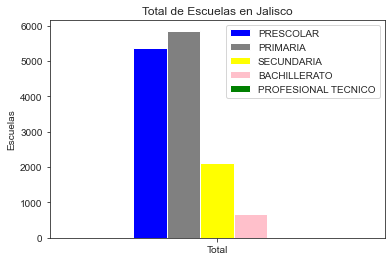

In [238]:
colors = ['blue','gray','yellow','pink', 'green']
ax = totalEscuelas.plot(kind = 'bar',color = colors )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Total de Escuelas en Jalisco')
ax.set(ylabel='Escuelas')

In [239]:
def estudiantesASalir(nivel,totalEsc, dfAT):
    # Variables
    colors = ['blue','gray']
    nivelDic = {'PREESCOLAR' : ['Preescolar','Primaria'],'PRIMARIA' : ['Primaria','Secundaria'], 'SECUNDARIA' : ['Secundaria','Bachillerato'] }
    
    # Numero de Estudiantes
    nivel1 = df_alumnos_total_['T6' if nivel == 'PRIMARIA' else 'T3'].groupby([dfAT['NIVEL'] == str(nivelDic[nivel][0]).upper(),
                                                                                     dfAT['NOMBRE MUNICIPIO'] == 'GUADALAJARA']).head(totalEsc).sum()
    nivel2 = df_alumnos_total_['T6' if nivel == 'PREESCOLAR' else 'T3'].groupby([dfAT['NIVEL'] == str(nivelDic[nivel][1]).upper(),
                                                                                    dfAT['NOMBRE MUNICIPIO'] == 'GUADALAJARA']).head(totalEsc).sum()
    
    # DataFrame
    proximos_estudiantes = pd.DataFrame(data = { nivelDic[nivel][0]:nivel1, nivelDic[nivel][1]:nivel2}, index=["Total"])
    
    # Grafica
    ax = proximos_estudiantes.plot(kind = 'bar',color = colors )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
    ax.set_title('Total de alumnos a salir de {} escuelas en {}'.format(totalEsc,'Guadalajara'))
    ax.set(ylabel='Alumnos')
    ax.set(xlabel='{}: {}, {}: {}'.format(nivelDic[nivel][0],nivel1,nivelDic[nivel][1],nivel2))

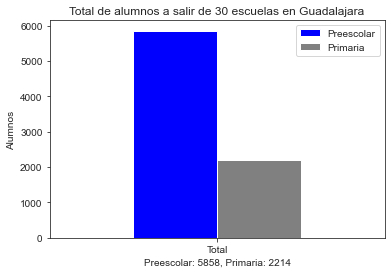

In [240]:
estudiantesASalir("PREESCOLAR",30,df_alumnos_total_)

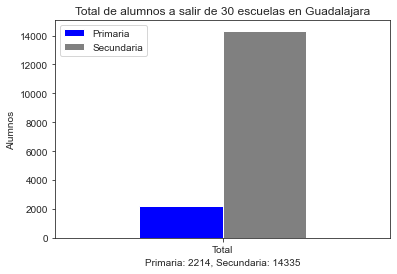

In [241]:
estudiantesASalir("PRIMARIA",30,df_alumnos_total_)

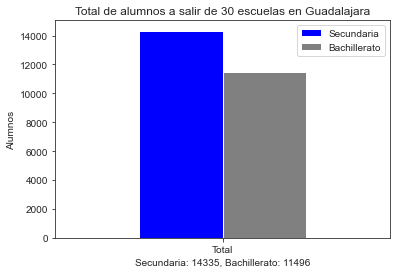

In [242]:
estudiantesASalir("SECUNDARIA",30,df_alumnos_total_)

In [243]:
df_alumnos_total = df_alumnos_total_
df_alumnos_total.drop(df_alumnos_total.columns[7:12], axis = 1, inplace = True)
df_alumnos_total

,NOM TURNO,NOMBRE CT,Full Address,NOMBRE MUNICIPIO,SOSTENIMIENTO,NIVEL,PROGRAMA,T6,HOMBRES TOTAL,MUJERES TOTAL,...,DOCENTES,GRUPOS,DOCENETE EDUCACION FISICA,DOCENTE ACTIVIDADES ARTISTICAS,DOCENTE ACTIVIDADES TECNONOLOGICAS,DOCENTE DE IDIOMAS,PERSONAL DE ADMINISTRATIVO Y SERVICIOS,DIRECTOR CON GRUPO,DIRECTOR SIN GRUPO,TOTAL DE PERSONAL
0,MATUTINO,juan de la barera,ARQUIMEDES 723 GUADALAJARA HERMOSA PROVINCIA,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,0,92,100,...,6,6,1,1,0,0,2,0,1,11
1,MATUTINO,josefa ortÃ­z de domÃ­nguez,OBREGON 70 AUTLAN DE NAVARRO 0,AUTLAN DE NAVARRO,FEDERALIZADO,PREESCOLAR,GENERAL,0,78,89,...,7,7,1,1,0,0,2,1,0,11
2,MATUTINO,rOSAURA sAPATA,PEDRO CELESTINO NEGRETE 144 GUADALAJARA OBLATOS,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,0,124,92,...,7,7,1,1,0,0,2,0,1,12
3,MATUTINO,Unidad Modelo,UNIDAD MODELO GUADALAJARA UNIDAD MODELO,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,0,64,50,...,5,5,1,2,0,0,2,0,1,11
4,MATUTINO,CIPRIANA GUTIERREZ RODRIGUEZ,GREGORIO DAVILA 1081 GUADALAJARA MEZQUITAN COU...,GUADALAJARA,FEDERALIZADO,PREESCOLAR,GENERAL,0,43,40,...,4,4,1,0,0,0,2,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14013,MATUTINO,CECYTEJ SAN IGNACIO CERRO GORDO EXTENSION CA...,PROLONGACION ITURBIDE 797 CAPILLA DE GUADALUPE...,TEPATITLAN DE MORELOS,ESTATAL,BACHILLERATO,TECNOLOGICO,0,129,192,...,0,9,0,0,0,0,0,0,0,0
14014,VESPERTINO,CECYTEJ TOTATICHE EXTENSION COLOTLAN,AVENIDA DE LA JUVENTUD 16 COLOTLAN CUARTO CENT...,COLOTLAN,ESTATAL,BACHILLERATO,TECNOLOGICO,0,63,62,...,0,5,0,0,0,0,0,0,0,0
14015,MATUTINO,CECYTEJ ENCARNACION DE DIAZ EXTENSION BAJIO D...,JOSE DE JESUS MUâOZ BAJIO DE SAN JOSE 0,ENCARNACION DE DIAZ,ESTATAL,BACHILLERATO,TECNOLOGICO,0,50,53,...,0,3,0,0,0,0,0,0,0,0
14016,VESPERTINO,CECYTEJ ENCARNACION DE DIAZ EXTENSION BAJIO D...,JOSE DE JESUS MUâOZ BAJIO DE SAN JOSE 0,ENCARNACION DE DIAZ,ESTATAL,BACHILLERATO,TECNOLOGICO,0,9,13,...,0,1,0,0,0,0,0,0,0,0


In [266]:
def plotTotalHombresMujeres(nivel,numeroEsc,ciudad):
    df_nivel = df_alumnos_total.where(df_alumnos_total['NIVEL'] == nivel ).where(df_alumnos_total['NOMBRE MUNICIPIO'] == ciudad).dropna()
    hT_nivel = df_nivel['HOMBRES TOTAL'].head(numeroEsc).sum()
    mT_nivel = df_nivel['MUJERES TOTAL'].head(numeroEsc).sum()
    
    colors = ['blue','pink']
    height = [hT_nivel, mT_nivel]
    bars = ('Hombres Total {}'.format(hT_nivel), 'Mujeres Total {}'.format(mT_nivel))
    y_pos = np.arange(len(bars))
    # Create bars
    plt.bar(y_pos, height, color=colors)
    # Create names on the x-axis
    plt.xticks(y_pos, bars)
    plt.title('Total de H y M de {} de {} escuelas en {}'.format(nivel,numeroEsc,ciudad))
    plt.show()

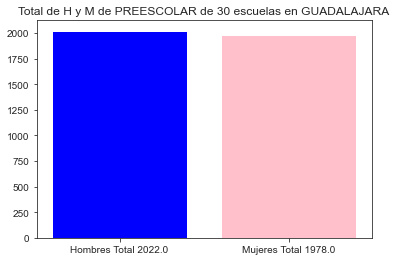

In [267]:
plotTotalHombresMujeres('PREESCOLAR',30,'GUADALAJARA')

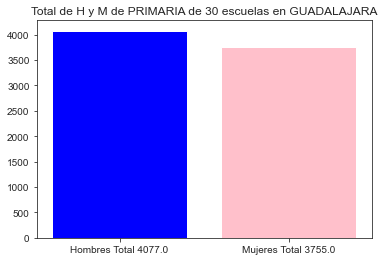

In [268]:
plotTotalHombresMujeres('PRIMARIA',30,'GUADALAJARA')

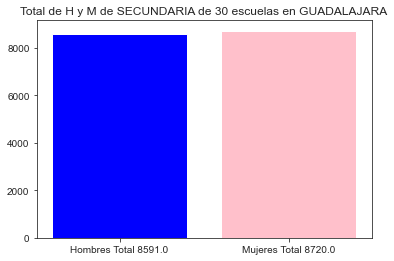

In [269]:
plotTotalHombresMujeres('SECUNDARIA',30,'GUADALAJARA')

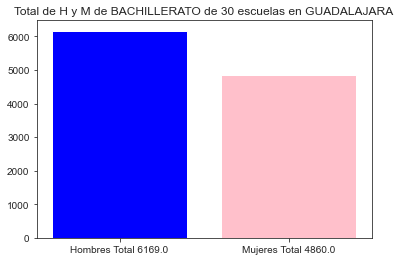

In [270]:
plotTotalHombresMujeres('BACHILLERATO',30,'GUADALAJARA')

### Creamos una columna con el numero total de alumnos por escuela

In [251]:
df_alumnos_total['ALUMNOS TOTAL'] = df_alumnos_total['HOMBRES TOTAL'] + df_alumnos_total['MUJERES TOTAL'] 
df_alumnos_total['ALUMNOS TOTAL'].max()

2958

### Graficamos el numero total de alumnos por escuela

(0.0, 3000.0)

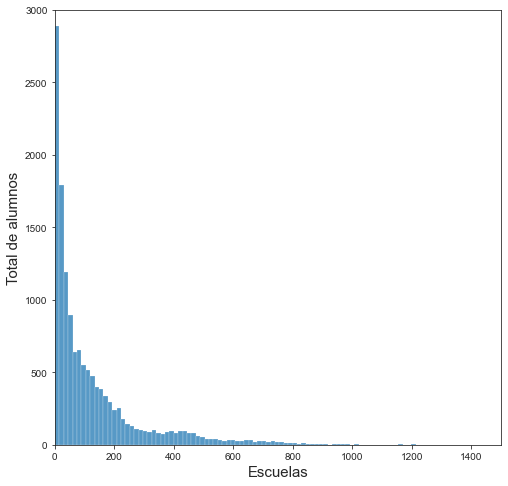

In [252]:
sns.set_style('ticks')
plt.figure(figsize=(8,8))
plt.xlabel("Escuelas", fontsize=15)
plt.ylabel("Total de alumnos",fontsize=15)
ax = sns.histplot(df_alumnos_total['ALUMNOS TOTAL'], kde=False, bins=200);
ax.set_xlim(0,1500)
ax.set_ylim(0,3000)

### ¿Qué hay más? ¿Hombres o mujeres?

In [253]:
total_hombres = df_alumnos_total['HOMBRES TOTAL'].sum()
total_hombres

931561

In [254]:
total_hombres = df_alumnos_total['HOMBRES TOTAL'].sum()
total_hombres

931561

### Mujeres

In [255]:
total_mujeres = df_alumnos_total['MUJERES TOTAL'].sum()
total_mujeres

899747

### Hombres + Mujeres

In [256]:
total_hombres_mujeres = total_hombres + total_mujeres
total_hombres_mujeres

1831308

### DataFrame Estudiantes

In [257]:
estudiantes = pd.DataFrame(data = { 'Hombres':total_hombres, 'Mujeres':total_mujeres, 'Total H + M': total_hombres_mujeres}, index=["Total"])
estudiantes

,Hombres,Mujeres,Total H + M
Total,931561,899747,1831308


[Text(0, 0.5, 'Alumnos')]

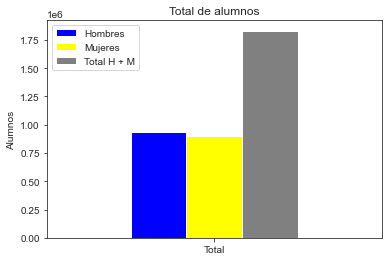

In [258]:
colors = ['blue','yellow','gray']
ax = estudiantes.plot(kind = 'bar',color = colors )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Total de alumnos')
ax.set(ylabel='Alumnos')

### Agrupamos por nivel

In [261]:
df_groupby_nivel = df_escuelas.groupby(["NIVEL","PROGRAMA"]).sum()
df_groupby_nivel

T6  HOMBRES TOTAL  MUJERES TOTAL  \
NIVEL               PROGRAMA                                                  
BACHILLERATO        BIS NO ESC              0          11079           9146   
                    BTS NO ESC              0            670            139   
                    GENERAL                 0          22009          22992   
                    TECNOLOGICO             0          37404          33547   
PREESCOLAR          CENDI                   0            437            442   
                    CONAFE                  0           4023           3968   
                    GENERAL                 0         155655         152411   
                    INDIGENA                0            713            696   
PRIMARIA            CONAFE                627           2128           1908   
                    GENERAL            151361         471808         451306   
                    INDIGENA             1040           3284           3250   
PROFESIONAL TECNICO PROFESIONAL MEDIO       0            268            342   
SECUNDARIA          CONAFE                  0           1457           1663   
                    GENERAL                 0         132864         131336   
                    TECNICA                 0          67350          67226   
                    TELESECUNDARIA          0          20412          19375   

                                       MATRICULA TOTAL  DOCENTES  GRUPOS  \
NIVEL               PROGRAMA                                               
BACHILLERATO        BIS NO ESC                   20225      1106    1072   
                    BTS NO ESC                     809         9      36   
                    GENERAL                      45001      3762    1638   
                    TECNOLOGICO                  70951      3607    2169   
PREESCOLAR          CENDI                          879        81      41   
                    CONAFE                        7991       871    1083   
                    GENERAL                     308066     13525   13525   
                    INDIGENA                      1409        79      79   
PRIMARIA            CONAFE                        4036       536     536   
                    GENERAL                     923114     33485   33519   
                    INDIGENA                      6534       319     319   
PROFESIONAL TECNICO PROFESIONAL MEDIO              610        70      32   
SECUNDARIA          CONAFE                        3120       342     342   
                    GENERAL                     264200     17353    7439   
                    TECNICA                     134576      6894    3595   
                    TELESECUNDARIA               39787      2328    2470   

                                       DOCENETE EDUCACION FISICA  \
NIVEL               PROGRAMA                                       
BACHILLERATO        BIS NO ESC                                 0   
                    BTS NO ESC                                 0   
                    GENERAL                                    0   
                    TECNOLOGICO                                0   
PREESCOLAR          CENDI                                      0   
                    CONAFE                                     0   
                    GENERAL                                 1505   
                    INDIGENA                                   0   
PRIMARIA            CONAFE                                     0   
                    GENERAL                                 3238   
                    INDIGENA                                   0   
PROFESIONAL TECNICO PROFESIONAL MEDIO                          0   
SECUNDARIA          CONAFE                                     0   
                    GENERAL                                 1329   
                    TECNICA                                  489   
                    TELESECUNDARIA                             1   

                          

In [262]:
df_groupby_nivel.drop(df_groupby_nivel.columns[5:14], axis = 1, inplace = True)
df_groupby_nivel

T6  HOMBRES TOTAL  MUJERES TOTAL  \
NIVEL               PROGRAMA                                                  
BACHILLERATO        BIS NO ESC              0          11079           9146   
                    BTS NO ESC              0            670            139   
                    GENERAL                 0          22009          22992   
                    TECNOLOGICO             0          37404          33547   
PREESCOLAR          CENDI                   0            437            442   
                    CONAFE                  0           4023           3968   
                    GENERAL                 0         155655         152411   
                    INDIGENA                0            713            696   
PRIMARIA            CONAFE                627           2128           1908   
                    GENERAL            151361         471808         451306   
                    INDIGENA             1040           3284           3250   
PROFESIONAL TECNICO PROFESIONAL MEDIO       0            268            342   
SECUNDARIA          CONAFE                  0           1457           1663   
                    GENERAL                 0         132864         131336   
                    TECNICA                 0          67350          67226   
                    TELESECUNDARIA          0          20412          19375   

                                       MATRICULA TOTAL  DOCENTES  \
NIVEL               PROGRAMA                                       
BACHILLERATO        BIS NO ESC                   20225      1106   
                    BTS NO ESC                     809         9   
                    GENERAL                      45001      3762   
                    TECNOLOGICO                  70951      3607   
PREESCOLAR          CENDI                          879        81   
                    CONAFE                        7991       871   
                    GENERAL                     308066     13525   
                    INDIGENA                      1409        79   
PRIMARIA            CONAFE                        4036       536   
                    GENERAL                     923114     33485   
                    INDIGENA                      6534       319   
PROFESIONAL TECNICO PROFESIONAL MEDIO              610        70   
SECUNDARIA          CONAFE                        3120       342   
                    GENERAL                     264200     17353   
                    TECNICA                     134576      6894   
                    TELESECUNDARIA               39787      2328   

                                       ALUMNOS TOTAL  
NIVEL               PROGRAMA                          
BACHILLERATO        BIS NO ESC                 20225  
                    BTS NO ESC                   809  
                    GENERAL                    45001  
                    TECNOLOGICO                70951  
PREESCOLAR          CENDI                        879  
                    CONAFE                      7991  
                    GENERAL                   308066  
                    INDIGENA                    1409  
PRIMARIA            CONAFE                      4036  
                    GENERAL                   923114  
                    INDIGENA                    6534  
PROFESIONAL TECNICO PROFESIONAL MEDIO            610  
SECUNDARIA          CONAFE                      3120  
                    GENERAL                   264200  
                    TECNICA                   134576  
                    TELESECUNDARIA             39787

In [5]:
#!pip install chart_studio
import chart_studio.plotly as py
import numpy as np

data = [dict(
        visible = False,
        line=dict(color='#00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True

steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Sine Wave Slider')

PlotlyRequestError: Authentication credentials were not provided.